# Predicting Contraceptive Choice by a Demographic and Socioeconomic Analysis

## Data Loading & Initial Exploration

In [1]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_excel(r"C:\Users\Bhuvanesi Barua\principles-of-data-science-at-city-astrob1913\coursework\Contraceptive_data.xlsx")
df.head()            #Display first 5 rows

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [2]:
#Get dimensions
df.shape       

(1473, 10)

In [3]:
#get data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   wife_age                  1473 non-null   int64
 1   wife_edu                  1473 non-null   int64
 2   husband_edu               1473 non-null   int64
 3   num_children              1473 non-null   int64
 4   wife_religion             1473 non-null   int64
 5   wife_working              1473 non-null   int64
 6   husband_occupation        1473 non-null   int64
 7   standard_of_living_index  1473 non-null   int64
 8   media_exposure            1473 non-null   int64
 9   contraceptive_method      1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [4]:
#Statistical summary
df.describe()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


## Data Quality Check & Preparation

In [5]:
df.isna().sum()  #checking for any missing values

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

In [6]:
df['contraceptive_method'].unique()  #Target variable inspection

array([1, 2, 3])

In [7]:
df_clean =df.copy()  # create clean copy

## Univariate Analysis - Demographic Distributions

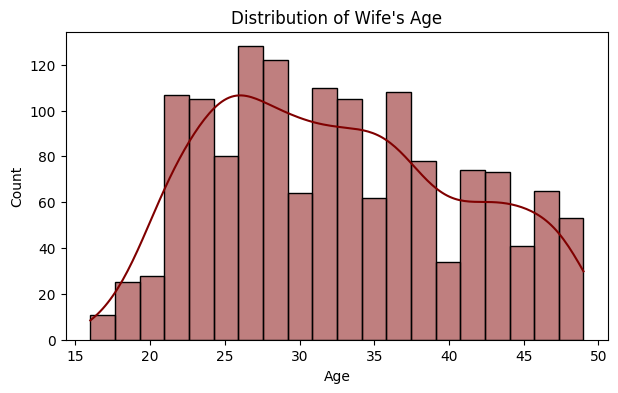

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(df_clean['wife_age'],kde=True,bins=20,color="maroon")
plt.title("Distribution of Wife's Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The above histogram shows that wives’ ages in the sample range roughly from 16 to 49 years, with most observations concentrated between about 20 and 35. The distribution is unimodal, peaking in the mid– to late–20s, and then gradually declining for higher ages, with relatively few women below 20 or above 40. 

This indicates that the dataset is dominated by women in their prime reproductive years, which is important to keep in mind when interpreting patterns of contraceptive method choice.

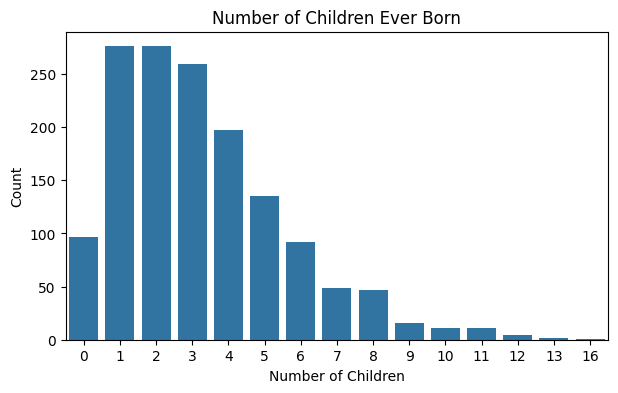

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(x='num_children',data=df_clean)
plt.title("Number of Children Ever Born")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

This chart is heavily right‑skewed. Most women have between 1 and 3 children, with having 1 child and 2 children appearing to be the most common, while the proportion declines steadily as parity increases. Only a small minority have large family sizes (6 or more children, up to a maximum of about 16), indicating that high-parity births are relatively rare in this sample; this contrast between low and very high parity groups is likely important when examining contraceptive use and unmet need.

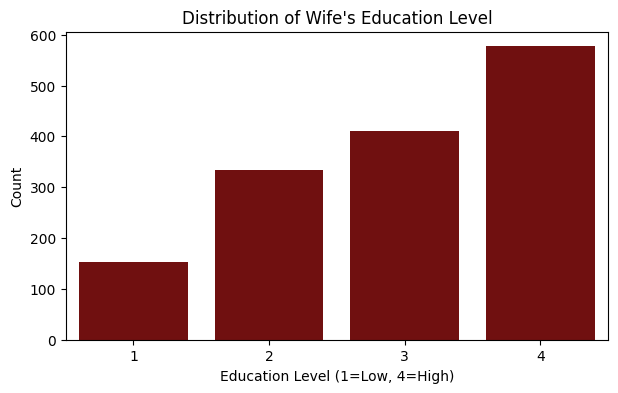

In [10]:
plt.figure(figsize=(7,4))
sns.countplot(x='wife_edu',data=df_clean, color="maroon")
plt.title("Distribution of Wife's Education Level")
plt.xlabel("Education Level (1=Low, 4=High)")
plt.ylabel("Count")
plt.show()

The distribution of wife’s education is skewed toward higher education levels. Counts increase steadily from level 1 to level 4, with the largest group in the highest category (4) and the smallest in the lowest (1). 

This indicates that the sample is relatively well educated overall, which may be associated with greater awareness and use of modern contraceptive methods in subsequent analyses.

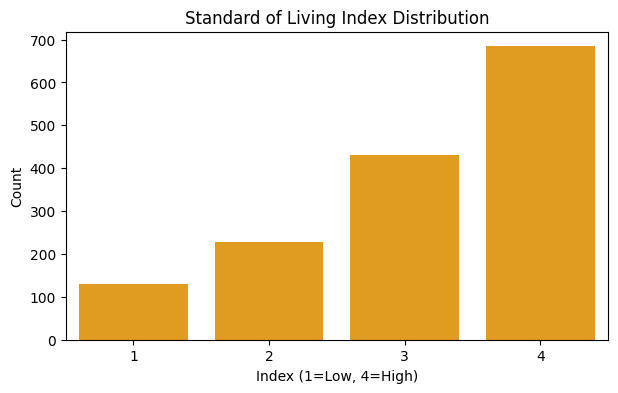

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x='standard_of_living_index',data=df_clean, color ="orange")
plt.title("Standard of Living Index Distribution")
plt.xlabel("Index (1=Low, 4=High)")
plt.ylabel("Count")
plt.show()

The standard of living index is clearly skewed toward the higher end. Very few households fall in the lowest category (1), and the counts increase steadily through 2 and 3, reaching the highest frequency at index 4. 

This suggests that most households in the sample enjoy medium to high living standards, which may correlate with better access to health services and higher likelihood of using modern contraceptive methods.

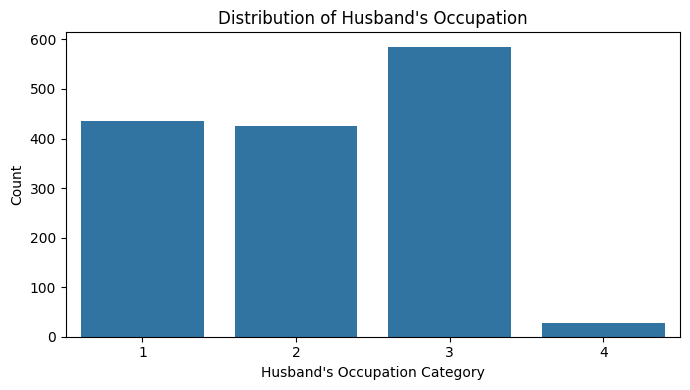

In [12]:
plt.figure(figsize=(7, 4))

occ_counts =df["husband_occupation"].value_counts().sort_index()
ax = sns.countplot(data=df,
    x="husband_occupation",
    order=occ_counts.index
)
ax.set_title("Distribution of Husband's Occupation")
ax.set_xlabel("Husband's Occupation Category")
ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

This bar graph shows that most husbands fall into occupation category 3, followed by categories 1 and 2, which have very similar counts. Category 4 is extremely rare, with only a small number of husbands in this group. 

This indicates that the sample is heavily concentrated in the first three occupation types, and any analysis involving category 4 will be based on very limited data and should be interpreted cautiously.

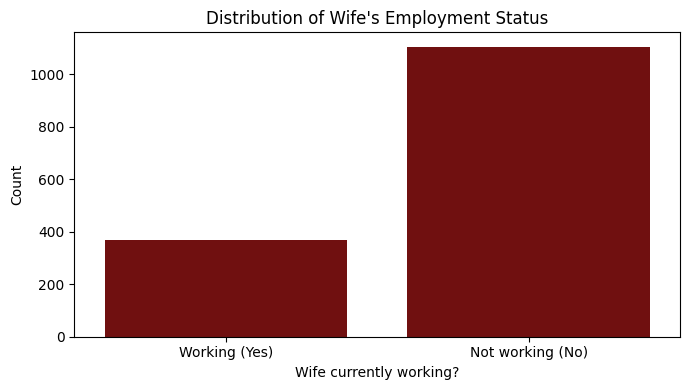

In [13]:
work_map = {0: "Working (Yes)",1: "Not working (No)"}

df["wife_working_label"] = df["wife_working"].map(work_map)

plt.figure(figsize=(7,4))

work_counts = df["wife_working_label"].value_counts().reindex(
    ["Working (Yes)", "Not working (No)"]
)
ax = sns.countplot(
    data=df,
    x="wife_working_label",
    order=work_counts.index,
    color="maroon"
)
ax.set_title("Distribution of Wife's Employment Status")
ax.set_xlabel("Wife currently working?")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

This chart shows that the majority of women in the sample are not currently working, while only a much smaller group reports being employed. 

This imbalance means the dataset is dominated by non‑working wives, so any comparison of contraceptive behaviour by employment status will be based on a relatively small working group and should be interpreted with that skew in mind.

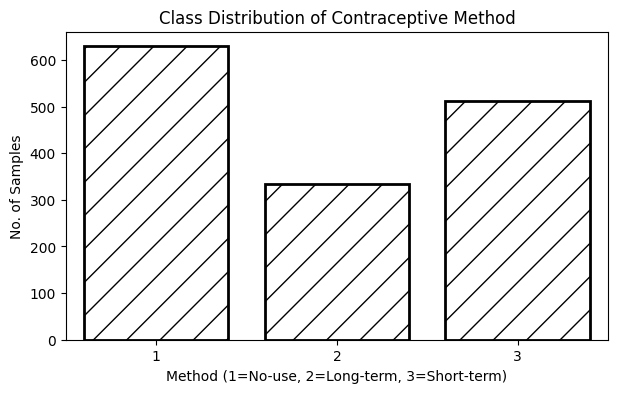

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(x='contraceptive_method',data=df_clean,color="white",edgecolor="black",hatch="/",lw=2)
plt.title("Class Distribution of Contraceptive Method")
plt.xlabel("Method (1=No-use, 2=Long-term, 3=Short-term)")
plt.ylabel("No. of Samples")
plt.show()

This class distribution shows that non‑use of contraception (category 1) is the most common, followed by short‑term methods (category 3), while long‑term methods (category 2) are the least used. This indicates a substantial proportion of women are either not using contraception or relying mainly on short‑term options, with comparatively low uptake of long‑acting methods. 

The imbalance between classes is important to consider when modeling contraceptive choice, as it may affect classification performance and the interpretation of results.

## Steps to answer the 4 Analytical question:

### Q1: How do key demographic characteristics, including wife’s age, number of children ever born, and education level, differ across contraceptive method groups? 

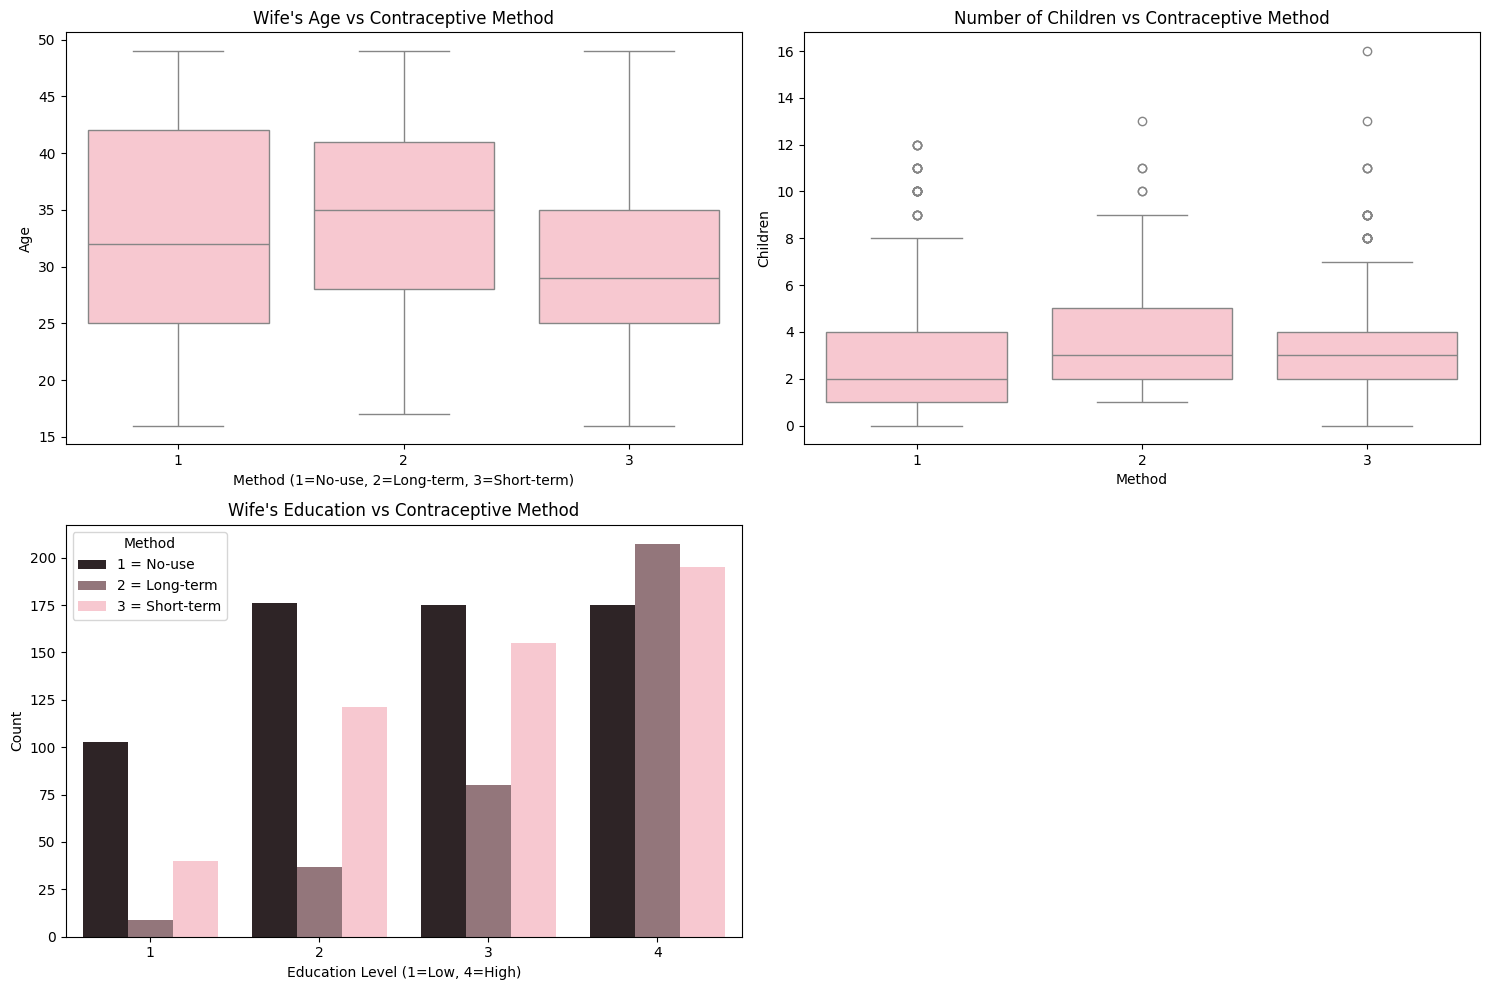

In [15]:
#1=No-use, 2=Long-term, 3=Short-term
fig =plt.figure(figsize=(15, 10))

#Age vs Method 
ax1= plt.subplot(2, 2, 1)
sns.boxplot(x='contraceptive_method',y='wife_age',data=df_clean,ax=ax1,color="pink")
ax1.set_title("Wife's Age vs Contraceptive Method")
ax1.set_xlabel("Method (1=No-use, 2=Long-term, 3=Short-term)")
ax1.set_ylabel("Age")

#Children vs Method 
ax2= plt.subplot(2, 2, 2)
sns.boxplot(x='contraceptive_method',y='num_children',data=df_clean,ax=ax2,color="pink")
ax2.set_title("Number of Children vs Contraceptive Method")
ax2.set_xlabel("Method")
ax2.set_ylabel("Children")

#Education vs Method
ax3 = plt.subplot(2, 2, 3)
sns.countplot(x='wife_edu',hue='contraceptive_method',data=df_clean,ax=ax3,palette="dark:pink")
ax3.set_title("Wife's Education vs Contraceptive Method")
ax3.set_xlabel("Education Level (1=Low, 4=High)")
ax3.set_ylabel("Count")
ax3.legend(title="Method", labels=[
    "1 = No-use",
    "2 = Long-term",
    "3 = Short-term"
])
plt.tight_layout()
plt.show()

#### Wife’s age:

- Women using long‑term methods (2) tend to be the oldest, with the highest median age.

- Short‑term users (3) are on average younger, and non‑users (1) sit in between, with the widest spread in ages.

- Age distributions overlap, but there is a clear tendency for more “permanent” choices among older women.

#### Number of children ever born:

- Non‑users (1) have the fewest children on average (median around 2).
Long‑term users (2) show the highest parity, with a median near 3–4 children and more high‑parity outliers.

- Short‑term users (3) also have more children than non‑users, but typically slightly fewer than long‑term users.

- This suggests that women often adopt contraception—especially long‑term methods—after reaching higher family sizes.

#### Education level:

- At low education levels (1–2), non‑use dominates, and long‑term method use is relatively rare.

- As education increases to levels 3 and 4, counts of both long‑term and short‑term users rise sharply, and at the highest level, users (especially long‑term) outnumber non‑users.

- There is a strong positive association between higher education and use of modern contraceptive methods, particularly long‑term methods.

### Q2: How do socioeconomic factors such as standard of living, husband’s occupation, and media exposure relate to contraceptive method choice?

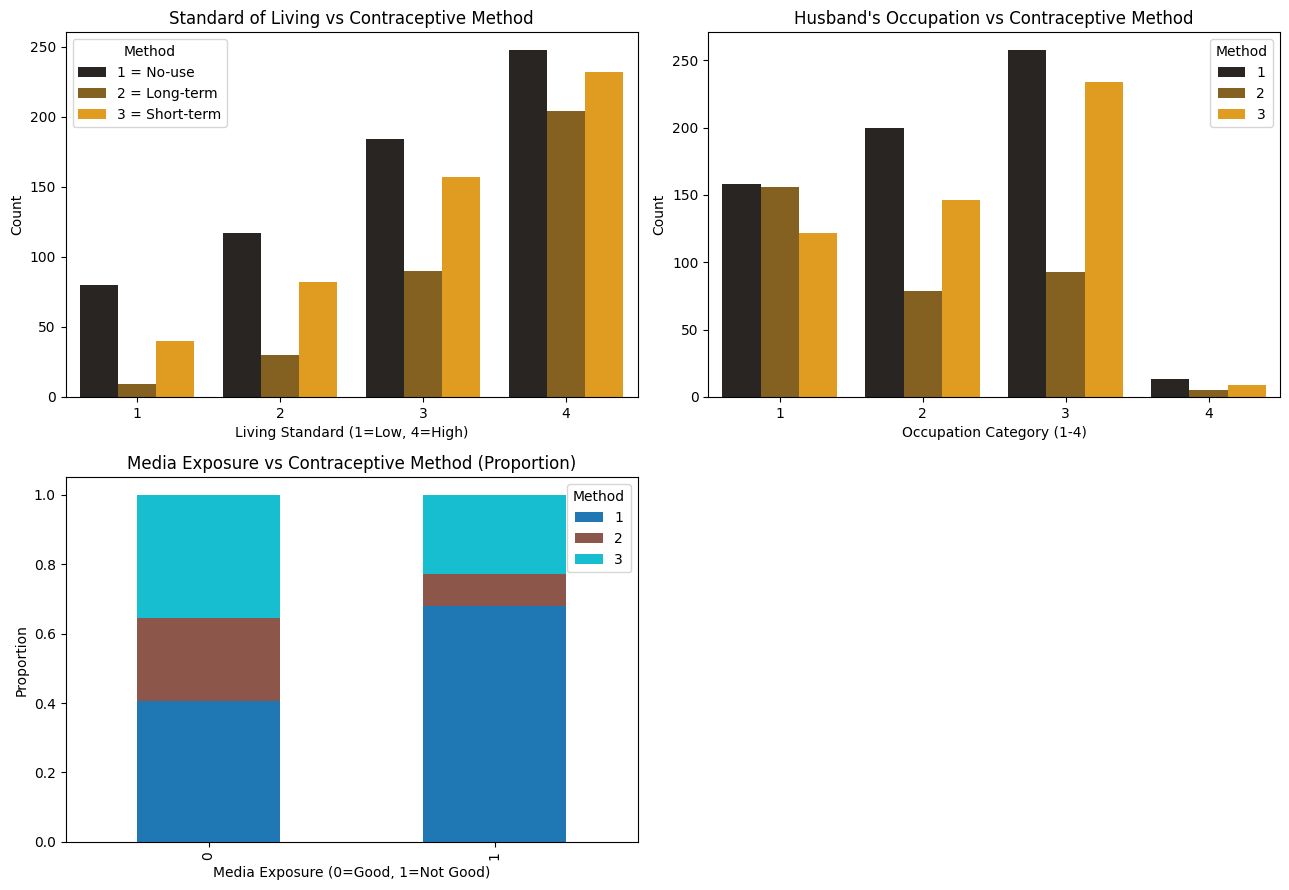

In [16]:
fig = plt.figure(figsize=(13,9))

#Standard of Living vs Method 
ax1= plt.subplot(2, 2, 1)
sns.countplot(x='standard_of_living_index',hue='contraceptive_method',data=df_clean, ax=ax1,palette="dark:orange")
ax1.set_title("Standard of Living vs Contraceptive Method")
ax1.set_xlabel("Living Standard (1=Low, 4=High)")
ax1.set_ylabel("Count")
ax1.legend(title="Method",labels=[
    "1 = No-use",
    "2 = Long-term",
    "3 = Short-term"
])

#Husband's Occupation vs Method 
ax2= plt.subplot(2, 2, 2)
sns.countplot(x='husband_occupation',hue='contraceptive_method',data=df_clean, ax=ax2,palette="dark:orange")
ax2.set_title("Husband's Occupation vs Contraceptive Method")
ax2.set_xlabel("Occupation Category (1-4)")
ax2.set_ylabel("Count")
ax2.legend(title="Method")

#Media Exposure vs Method
ax3 = plt.subplot(2, 2, 3)

media_method = pd.crosstab(df_clean['media_exposure'], 
                           df_clean['contraceptive_method'], 
                           normalize='index')
media_method.plot(kind='bar',stacked=True,ax=ax3,colormap="tab10")

ax3.set_title("Media Exposure vs Contraceptive Method (Proportion)")
ax3.set_xlabel("Media Exposure (0=Good, 1=Not Good)")
ax3.set_ylabel("Proportion")
ax3.legend(title="Method")

plt.tight_layout()
plt.show()

#### Standard of living:

- At low living standards (1–2), non‑use (1) is clearly dominant and long‑term methods (2) are rare.

- As the standard of living increases to 3 and 4, counts of both long‑term and short‑term methods rise sharply; at level 4, method users (2+3) are roughly comparable in number to non‑users.

- This suggests a positive association between living standard and use of modern contraception, especially long‑term methods.

#### Husband’s occupation:

- Across all occupation categories, non‑use remains the largest group, indicating that occupation alone is not a strong differentiator.

- Long‑term methods appear relatively more common in some categories (e.g., occupation 1), while short‑term methods peak in occupation 3, but the pattern is mixed and weaker than for living standard or media exposure.

- Overall, husband’s occupation shows only modest variation in contraceptive method choice.

#### Media exposure

- Among women with good media exposure (0), the proportions of long‑term and short‑term users are much higher, and non‑use drops to about 40%.

- With poor media exposure (1), non‑use jumps to around two‑thirds of women, and both long‑ and short‑term methods become much less common, especially long‑term methods.

- This indicates a strong association between access to media information and contraceptive uptake, with poor exposure linked to substantially higher non‑use.

### Q3: Does a woman’s employment status appear to be associated with contraceptive use, potentially reflecting differences in autonomy and planning?

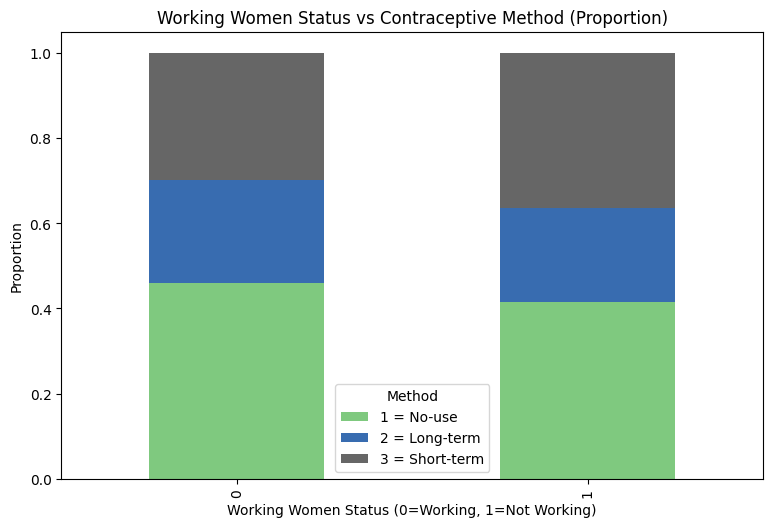

In [17]:
fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)

work_method = pd.crosstab(df_clean['wife_working'], 
                          df_clean['contraceptive_method'], 
                          normalize='index')

work_method.plot(kind='bar', stacked=True, ax=ax1, colormap='Accent')

ax1.set_title("Working Women Status vs Contraceptive Method (Proportion)")
ax1.set_xlabel("Working Women Status (0=Working, 1=Not Working)")
ax1.set_ylabel("Proportion")
ax1.legend(title="Method", labels=[
    "1 = No-use",
    "2 = Long-term",
    "3 = Short-term"
])

plt.tight_layout()
plt.show()

- In both groups, non‑use is the most common outcome, and the proportions of long‑term users are quite similar.

- Non‑working women show a slightly lower share of non‑use and a slightly higher share of short‑term methods, but long‑term use is almost identical across groups.

- However, employment status shows a slightly more use of long-term method compared to non-working women.This suggests that being in the workforce correlates with a slight increase in planned parenthood behaviors, likely due to increased autonomy and resource access.

Overall, any association between employment and contraceptive behaviour is weak in this dataset, suggesting that differences in autonomy or planning linked to work status are not clearly reflected in method choice. However, it also indicate that employment status alone does not strongly differentiate contraceptive behaviour.

### Q4: When all variables are considered together, which factors emerge as the strongest predictors of contraceptive method choice?

### Step:1- Exploratory Data Analysis

In [18]:
count= df_clean['contraceptive_method'].value_counts()
percent = df_clean['contraceptive_method'].value_counts(normalize=True) * 100

class_dist =pd.DataFrame({"Count": count, "Percentage": percent})
class_dist

,Count,Percentage
contraceptive_method,,
1,629,42.701969
3,511,34.691107
2,333,22.606925


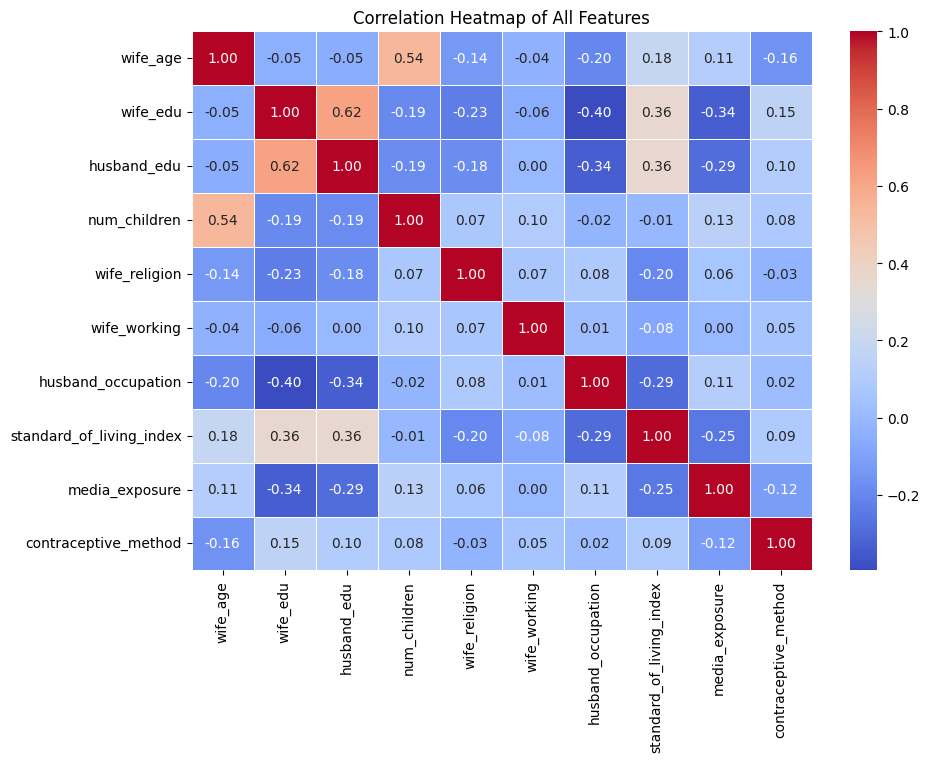

In [19]:
#Correlation Heatmap for all numerical variables
plt.figure(figsize=(10, 7))
corr_matrix= df_clean.corr()

sns.heatmap(corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of All Features")
plt.show()

- Here, no single variable is strongly associated with contraceptive method choice.
- Wife’s age (r= –0.16) – the largest correlation in magnitude; age is modestly related to method choice, with older women tending to fall in method categories with lower codes (more non‑use/less short‑term use).
- Wife’s education(r= 0.15) – higher education is weakly but consistently associated with moving away from non‑use towards use of contraceptive methods.
- Media exposure(r = –0.12) – since low values correspond to better exposure, the negative sign indicates that better media exposure is linked to greater contraceptive use.
- Husband’s education (r= 0.10) and standard of living index (r ≈ 0.09) also show small positive associations with method choice.
- Other factors (number of children, religion, working status, husband’s occupation) have only very weak correlations.

Thus, when all variables are considered together, wife’s age, wife’s education, and media exposure emerge as the strongest (though still modest) linear predictors of contraceptive method choice in this dataset, with husband’s education and standard of living playing secondary roles.

## 70/30 Train-Test Split

In [20]:
#Define features (X) and target (y)

X= df_clean.drop('contraceptive_method', axis=1)
y = df_clean['contraceptive_method']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

Stratified to ensure each contraceptive method class is represented equally in train and test splits.

## Train the Random Forest Model using Bootstrapping

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,        # stronger bagging
    bootstrap=True,      
    max_depth=None,
    min_samples_leaf=5,  # reduces noise
    max_features='sqrt', # decorrelates trees
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred= rf.predict(X_test)

#Accuracy
accuracy= accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5656108597285068


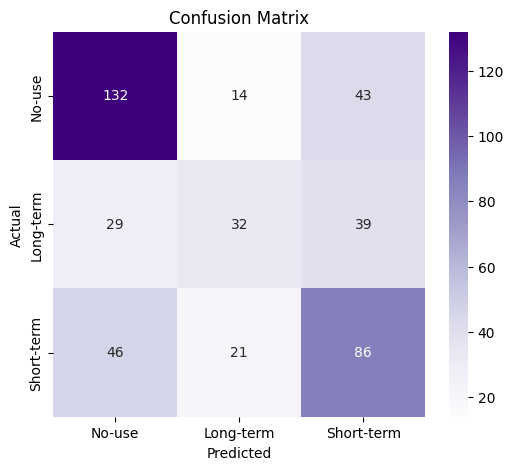

In [24]:
plt.figure(figsize=(6,5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d",cmap="Purples",
            xticklabels=["No-use", "Long-term", "Short-term"],
            yticklabels=["No-use", "Long-term", "Short-term"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- No‑use: 132 women are correctly classified as non‑users, with 57 misclassified (14 as long‑term, 43 as short‑term). This class has the best recall (about 70%), so the joint demographic and socioeconomic profile captures non‑users relatively well.
- Short‑term users: 86 are correctly identified, while 67 are misclassified as no‑use or long‑term. Prediction is moderate.
- Long‑term users: Only 32 are correctly predicted; 68 are misclassified as no‑use or short‑term. This is the hardest group to identify, indicating that none of the measured variables, even when combined, strongly separate long‑term users from the other groups.

Taken together, all the variables in the model do a reasonable job of telling apart women who use no contraception from those who use it, especially short‑term methods. However, the model struggles to accurately pick out long‑term method users. This suggests that the decision to adopt long‑term contraception is likely driven by other factors that are not captured in the dataset—such as partner preferences, fertility intentions, counselling quality, or the availability of services—rather than by demographic and socioeconomic characteristics alone.

In [25]:
feature_importance = pd.DataFrame({'Feature': X.columns,'Importance': rf.feature_importances_
}).sort_values(by='Importance',ascending=False)

feature_importance

,Feature,Importance
0,wife_age,0.301468
3,num_children,0.295684
1,wife_edu,0.124272
6,husband_occupation,0.073112
7,standard_of_living_index,0.070093
2,husband_edu,0.062131
5,wife_working,0.034245
4,wife_religion,0.027843
8,media_exposure,0.011152


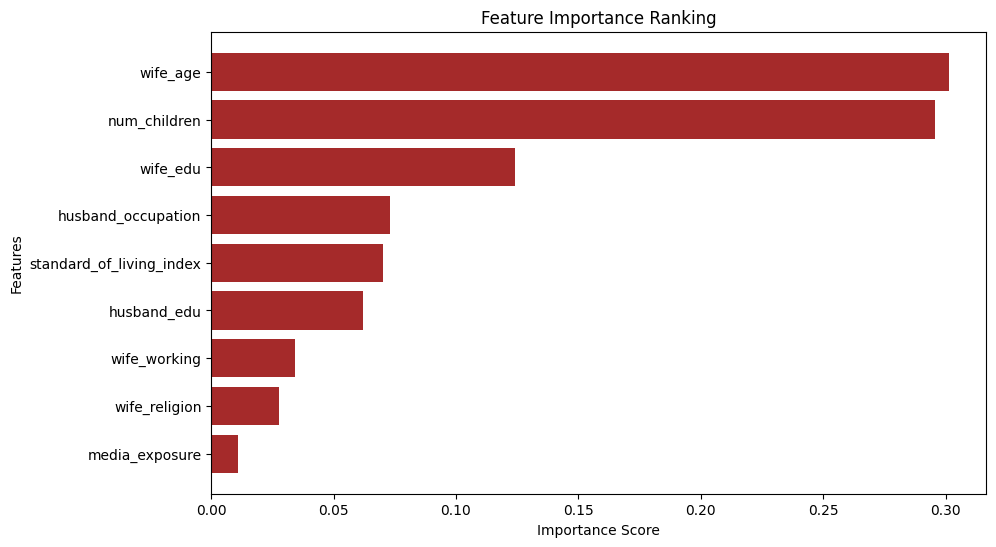

In [26]:
plt.figure(figsize=(10,6))
importances= rf.feature_importances_
indices= np.argsort(importances)

plt.barh(range(len(indices)),importances[indices],align='center',color="Brown")
plt.yticks(range(len(indices)),X.columns[indices])
plt.title("Feature Importance Ranking")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

- Wife’s age and number of children ever born are by far the strongest predictors of contraceptive method choice. The model relies on these two variables more than any others, indicating that age and parity are central to distinguishing between non‑use, short‑term use, and long‑term use.

- Wife’s education is the next most important variable, suggesting that women’s schooling meaningfully shapes which methods they use, over and above age and family size.

- A second tier of predictors includes husband’s occupation, standard of living index, and husband’s education, which contribute some additional predictive power but are noticeably less influential than age, children, and wife’s education.

- Working status of the wife, religion, and media exposure have relatively small importance scores, implying that, in this model, they add only limited information for predicting method choice once the stronger demographic and socioeconomic variables are already taken into account.

Overall, the model indicates that age, number of children, and wife’s education are the key drivers of contraceptive method choice in this dataset, with other socioeconomic and contextual factors playing supporting but smaller roles.

#### AI Assistance Declaration:
I declare that the project objective, experimental design, and data analysis presented in this notebook are my own work. I utilized AI tools to assist in structuring specific Python functions, debugging logic, and refining technical terminology precising the sentence for less word counts for documentation and analytical discussions. All final implementation, data preprocessing, and validation of results were performed independently.